# 1. Загрузите файл HR.csv в pandas dataframe

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats as st

In [4]:
data = pd.read_csv('HR.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# 2. Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение)

In [5]:
mean = data.mean()
median = data.median()
mode = data.mode()
minimum = data.min()
maximum = data.max()
std = data.std() #среднеквадратичное отклонение

print(mean, median, mode, minimum, maximum, std, sep = '\n')

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64
satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                 3.0            0.0   0.0                    0.0      sales   
1                 NaN    

In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [17]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


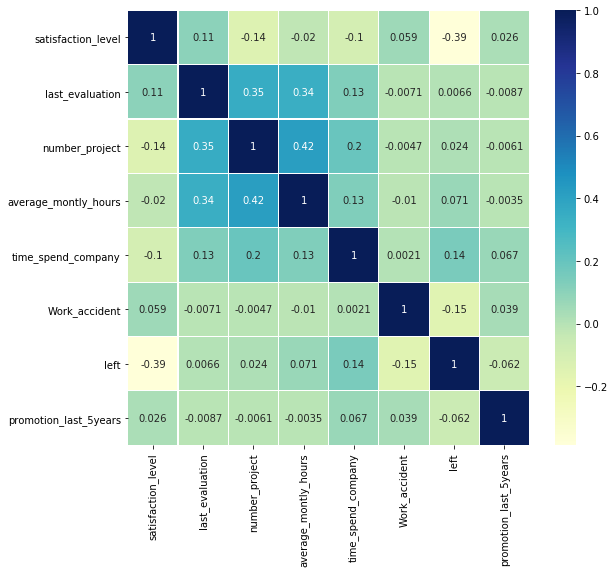

In [131]:
corrmat = data.corr()

f, ax = plt.subplots(figsize =(9, 8))

sns.heatmap(corrmat, annot=True, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

две самые скоррелированные переменные - average_monthly_hours (Среднее количество часов на рабочем месте в месяц) и number_projects (Количество проектов, выполненных за время работы).

две наименее скоррелированные переменные - work_accident (Происходили ли несчастные случаи на рабочем месте с сотрудником)и time_spend_company(Стаж работы в компании в годах)

# 4. Рассчитайте сколько сотрудников работает в каждом департаменте.


In [81]:
data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Наибольшее количество сотрудников работает в sales(4140 человек), наименьшее в management(630 человек)

# 5. Показать распределение сотрудников по зарплатам.

In [56]:
employees_salary = data.pivot_table(index = 'salary', values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)
employees_salary.columns = ['employees']
employees_salary

,employees
salary,
high,1237
low,7316
medium,6446


Text(0.5, 1.0, 'Распределение сотрудников по зарплате')

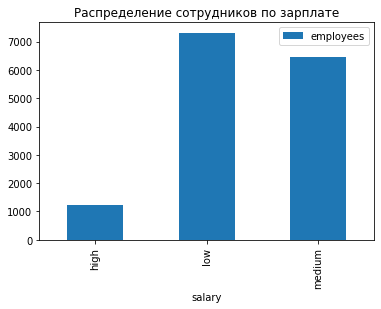

In [60]:
employees_salary.plot.bar()
plt.title('Распределение сотрудников по зарплате')

Наибольшее количество сотрудников с низким окладом. Тем не менее, в сумме сотрудников с высоким и средним окладом больше, чем с низким.
С низким окладом - 7316 человек. 
Со средним и высоким в сумме - 7683.

# 6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [73]:
department_salary = data.groupby(['department','salary']).count()[['satisfaction_level']]
department_salary.columns = ['employees']
department_salary

employees
department  salary           
IT          low           609
            medium        535
            high           83
RandD       low           364
            medium        372
            high           51
accounting  low           358
            medium        335
            high           74
hr          low           335
            medium        359
            high           45
management  low           180
            medium        225
            high          225
marketing   low           402
            medium        376
            high           80
product_mng low           451
            medium        383
            high           68
sales       low          2099
            medium       1772
            high          269
support     low          1146
            medium        942
            high          141
technical   low          1372
            medium       1147
            high          201

Text(0.5, 1.0, 'Распределение сотрудников департаментов по уровню зарплаты ')

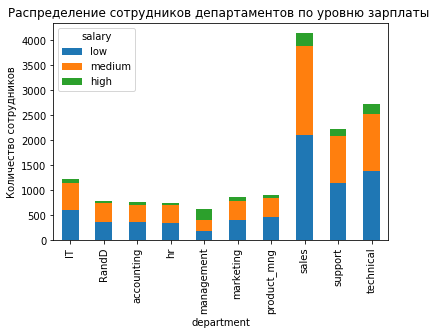

In [75]:
department_salary.unstack()['employees'].plot.bar(stacked=True)
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников департаментов по уровню зарплаты ')

В каждом отделе наблюдается примерно такая закономерность: количество людей с низким окладом = сотрудники с высоким окладом + сотрудники со средним размером оклада.
Исключение составляет отдел management, в котором примерно одинаковое количество людей и с низким окладом, и со средним, и с высоким.    

# 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [45]:
p = 0.05 #Допустимое отклонение. При p меньше 0.05 мы вынуждены отклонить нулевую гипотезу.

high_salary = data[data.salary == 'high'][['average_montly_hours']]
low_salary = data[data.salary == 'low'][['average_montly_hours']]

test = st.ttest_ind(high_salary, low_salary, equal_var=False) #T-тест для средних значений двух независимых выборок
print(test)

if (result.pvalue < alpha):
    print('Сотрудники с высоким и низким окладом проводят разное количество времени на рабочем месте. Нулевая гипотеза неверна.')
else:
    print('Сотрудники с высоким и низким окладом проводят примерно одинаковое количество времени на работе. Нулевая гипотеза верна.')

Ttest_indResult(statistic=array([-0.76243317]), pvalue=array([0.44590455]))
Сотрудники с высоким и низким окладом проводят примерно одинаковое количество времени на работе. Нулевая гипотеза верна.


In [82]:
#Проверим верна ли нулевая гипотеза при помощи нахождения среднего значения количества рабочих часов в разбивке по окладам
data.groupby(['salary']).mean()[['average_montly_hours']]

,average_montly_hours
salary,
low,200.996583
medium,201.338349
high,199.867421


# 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [89]:
production = pd.DataFrame(data['left'].value_counts(normalize=True)*100).reset_index()
production.columns = ['left','production_part']
production

,left,production_part
0,0,76.191746
1,1,23.808254


Те кто не уволился, повышались за последние 5 лет чаще (76%), чем те кто уволился(23%).

In [93]:
satisfaction = data.groupby('left').agg({'satisfaction_level': 'mean'}).reset_index()
satisfaction.columns = ['left','satisfaction_mean']
satisfaction

,left,satisfaction_mean
0,0,0.666810
1,1,0.440098


Удовлетворенность работой у не уволившихся выше, чем у уволившихся.

In [94]:
number_project = data.groupby('left').agg({'number_project': 'mean'}).reset_index()
number_project.columns = ['left','projects_mean']
number_project

,left,projects_mean
0,0,3.786664
1,1,3.855503


Количество проектов примерно одинакое у уволившихся и у не уволившихся.

# 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.

In [121]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(data.iloc[:,:-2], test_size=0.2)

In [122]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11999 entries, 190 to 8631
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11999 non-null  float64
 1   last_evaluation        11999 non-null  float64
 2   number_project         11999 non-null  int64  
 3   average_montly_hours   11999 non-null  int64  
 4   time_spend_company     11999 non-null  int64  
 5   Work_accident          11999 non-null  int64  
 6   left                   11999 non-null  int64  
 7   promotion_last_5years  11999 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 843.7 KB


In [123]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 4876 to 2650
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3000 non-null   float64
 1   last_evaluation        3000 non-null   float64
 2   number_project         3000 non-null   int64  
 3   average_montly_hours   3000 non-null   int64  
 4   time_spend_company     3000 non-null   int64  
 5   Work_accident          3000 non-null   int64  
 6   left                   3000 non-null   int64  
 7   promotion_last_5years  3000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 210.9 KB


In [124]:
y_train, y_test = training['left'], test['left']
del training['left']
del test['left']

In [125]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [126]:
lda.fit(training, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [127]:
lda.predict(test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [128]:
result = pd.DataFrame([y_test.values, lda.predict(test)]).T
result.head(5)

,0,1
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [129]:
lda.coef_

array([[-4.48873015e+00,  6.63132930e-01, -2.47388958e-01,
         4.24874709e-03,  2.31560003e-01, -1.05030802e+00,
        -1.05467536e+00]])

In [130]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test.values, lda.predict(test))).T

,0,1
0,2067,532
1,208,193


In [120]:
# Confusion Matrix Metrics
from sklearn.metrics import classification_report
print(classification_report(y_test.values, lda.predict(test)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2290
           1       0.48      0.25      0.33       710

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.59      3000
weighted avg       0.72      0.76      0.73      3000



Тестовая модель приняла верное решение 2 260 раз, неверное решение - 740 раз, т.е. в 75% случаев решение принято правильно.

При этом:

В сравнении с прогнозными данными в 80% случаев модель приняла верное решение, что сотрудник не уволился, в 48% случаев - сотрудник уволился.
В сравнении с фактическими данными в 92% случаев модель приняла верное решение, что сотрудник не уволился, в 25% случаев - сотрудник уволился.
Таким образом, в среднем модель определяет, что сотрудник не уволился с вероятностью 85%, сотрудник уволился - с вероятностью 33%. Средневзвешенная точность и полнота модели составляет 73%.

# 10. Загрузить jupyter notebook с решением на github и прислать ссылку

Done